In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [153]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.copy()
Y = numeros['target']
print(np.shape(X))

(1797, 8, 8)


In [154]:
inputs = torch.autograd.Variable(torch.Tensor(X).float()).unsqueeze(1)
print(inputs.size())

torch.Size([1797, 1, 8, 8])


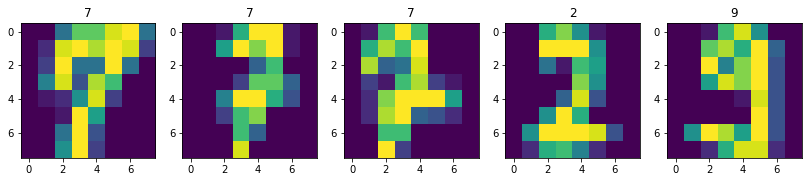

In [155]:
# muestra algunos ejemplos

n_items = inputs.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(inputs[item][0].detach().numpy())
    plt.title(Y[item])

In [186]:
# normaliza
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i])/std
np.shape(inputs)


torch.Size([1797, 1, 8, 8])

In [221]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3),
            torch.nn.Conv2d(16,8,kernel_size=3),
            torch.nn.Conv2d(8,4,kernel_size=3))
        self.decoder = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(4,8,kernel_size=3),
            torch.nn.ConvTranspose2d(8,16,kernel_size=3),
            torch.nn.ConvTranspose2d(16,1,kernel_size=3))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [230]:
# inicializa modelo, loss y optimizador
num_epochs = 400
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)

In [231]:
# entrenamiento
loss_list = [] 
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/400], loss:0.9917
epoch [2/400], loss:0.9587
epoch [3/400], loss:0.9398
epoch [4/400], loss:0.9085
epoch [5/400], loss:0.8586
epoch [6/400], loss:0.8242
epoch [7/400], loss:0.8385
epoch [8/400], loss:0.7972
epoch [9/400], loss:0.7704
epoch [10/400], loss:0.7639
epoch [11/400], loss:0.7550
epoch [12/400], loss:0.7388
epoch [13/400], loss:0.7234
epoch [14/400], loss:0.7162
epoch [15/400], loss:0.7122
epoch [16/400], loss:0.7033
epoch [17/400], loss:0.6915
epoch [18/400], loss:0.6822
epoch [19/400], loss:0.6761
epoch [20/400], loss:0.6713
epoch [21/400], loss:0.6666
epoch [22/400], loss:0.6612
epoch [23/400], loss:0.6542
epoch [24/400], loss:0.6454
epoch [25/400], loss:0.6361
epoch [26/400], loss:0.6281
epoch [27/400], loss:0.6216
epoch [28/400], loss:0.6153
epoch [29/400], loss:0.6079
epoch [30/400], loss:0.5993
epoch [31/400], loss:0.5908
epoch [32/400], loss:0.5836
epoch [33/400], loss:0.5775
epoch [34/400], loss:0.5717
epoch [35/400], loss:0.5664
epoch [36/400], loss:0.5615
e

In [228]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)
print(latent_space.size())

torch.Size([1797, 4, 2, 2])


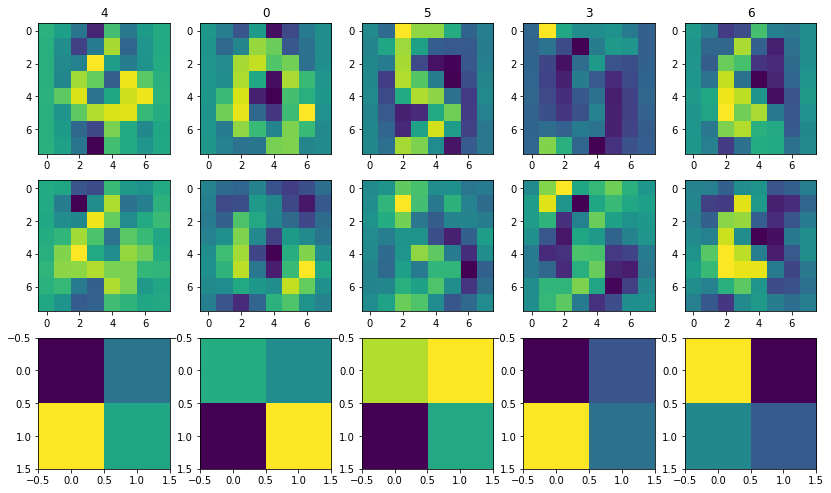

In [229]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 100
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow((inputs[i+offset][0].detach().numpy()))
    plt.title(Y[i+offset])
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][0].detach().numpy())
